## Libraries to use

In [1]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import re
from statsmodels.formula.api import ols
import numpy as np

# FIRST PART

In [2]:
def count(target):
    S = [2,3,4]
    # if the total is 0, return 1
    if target == 0:
        return 1
 
    # return 0 if total becomes negative
    if target < 0:
        return 0
 
    # initialize the total number of ways to 0
    result = 0
 
    # do for each ball
    for b in S:
        # recur to see if total can be reached by including current ball `b`
        result += count(target - b)
 
    # return the total number of ways
    return result


In [3]:
# `n` ball of given denominations
S = [2, 3, 4]
 
# total points
target = 8
 
print('The total number of ways is', count(target))

The total number of ways is 8


## The time complexity of the above solution is exponential since each recursive call is making n recursive calls. 

## This code is inspired by the resolution of the ''coin change problem'' posted on this blog: https://www.techiedelight.com/coin-change-problem-find-total-number-ways-get-denomination-coins/

#                                               SECOND PART

In [4]:
# Load data for each company and convert to a pandas dataframe
df_r1_c1 = pd.read_csv('datasets/region1_company1.csv')
df_r1_c2 = pd.read_csv('datasets/region1_company2.csv')
df_r2_c1 = pd.read_csv('datasets/region2_company1.csv')
df_r2_c2 = pd.read_csv('datasets/region2_company2.csv')
df_r1_c1.head()

,Sales_U,Sales_USD,Date
0,124885,129350,JAN0591.1
1,105285,107408,JAN1291.1
2,138363,136313,JAN1991.1
3,111494,113805,JAN2691.1
4,110686,113761,FEB0291.1


In [5]:
# Define string date to convert the columns date to an easily readable string
def string_date(string):
    string = re.sub("[A-Za-z]+", lambda ele: " " + ele[0] + " ", string)
    string = string[1:4] + ' ' + (' '.join([string[5:9][i:i+2] for i in range(0, len(string[5:9]), 2)]))
    string = string.replace(' ','-')
    return string

In [6]:
# Apply the function string_date to each dataframe
df_r1_c1.Date = df_r1_c1.Date.apply(lambda x: string_date(x))
df_r1_c2.Date = df_r1_c2.Date.apply(lambda x: string_date(x))
df_r2_c1.Date = df_r2_c1.Date.apply(lambda x: string_date(x))
df_r2_c2.Date = df_r2_c2.Date.apply(lambda x: string_date(x))

In [7]:
# Convert to datetime each column Date of each pandas dataframe
df_r1_c1.Date = df_r1_c1.Date.astype('datetime64[D]')
df_r1_c2.Date = df_r1_c2.Date.astype('datetime64[D]')
df_r2_c1.Date = df_r2_c1.Date.astype('datetime64[D]')
df_r2_c2.Date = df_r2_c2.Date.astype('datetime64[D]')

## Question 1

## Construct time-series plots of sales and prices for Company 1 in Region 1 and 2. Repeat the exercise for Company 2. Describe the differences or similarities between Company 1 and 2 pricing policies

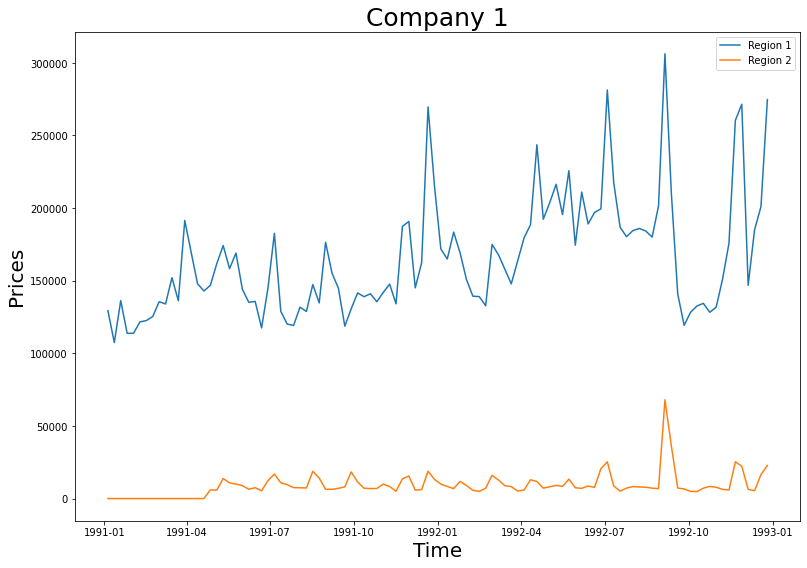

In [8]:
# plot prices vs time for company 1, region 1
plt.figure(figsize=(13,9))
plt.title("Company 1", fontsize = 25)
plt.xlabel("Time", fontsize = 20)
plt.ylabel("Prices", fontsize = 20)
plt.plot(df_r1_c1.Date,df_r1_c1.Sales_USD)
plt.plot(df_r2_c1.Date,df_r2_c1.Sales_USD)
plt.legend(['Region 1','Region 2'])

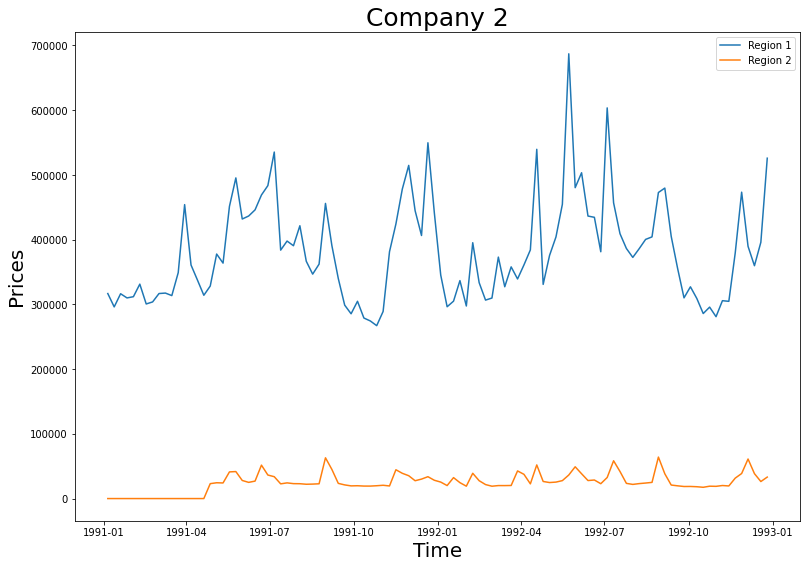

In [9]:
# plot prices vs time for company 1, region 2
plt.figure(figsize=(13,9))
plt.title("Company 2", fontsize = 25)
plt.xlabel("Time", fontsize = 20)
plt.ylabel("Prices", fontsize = 20)
plt.plot(df_r1_c2.Date,df_r1_c2.Sales_USD)
plt.plot(df_r2_c2.Date,df_r2_c2.Sales_USD)
plt.legend(['Region 1','Region 2'])

## The similarities are that in both companies region 1 is more expensive than region 2, on the other hand, region 2 of company 2 is less susceptible to price changes than region 2 of company 1.

## Question 2

## Construct scatter-plots of sales versus prices for Company 1 in Region 1 and Region 2 separately. Repeat the exercise for Company 2. Is there evidence for a negatively sloped demand-curve in the data? Eye-balling these plots, does demand appear more elastic in Region 1 or 2?

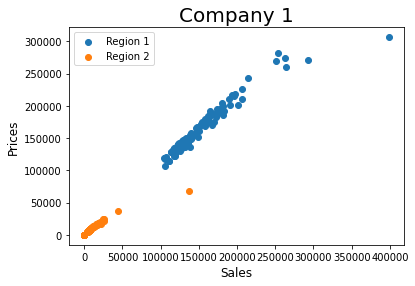

In [10]:
# scatterplot prices vs sales for company 1
plt.title("Company 1", fontsize = 20)
plt.xlabel("Sales", fontsize = 12)
plt.ylabel("Prices", fontsize = 12)
plt.scatter(df_r1_c1.Sales_U,df_r1_c1.Sales_USD)
plt.scatter(df_r2_c1.Sales_U,df_r2_c1.Sales_USD)
plt.legend(['Region 1','Region 2'])

## Region 1 is more elastic because the change in price produces a significant change in sales.






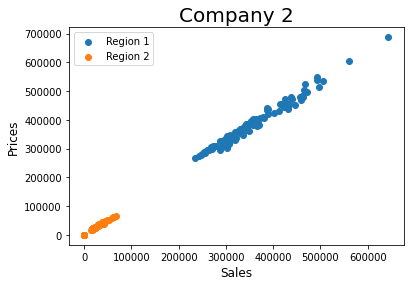

In [11]:
# scatterplot prices vs sales for company 2
plt.title("Company 2", fontsize = 20)
plt.xlabel("Sales", fontsize = 12)
plt.ylabel("Prices", fontsize = 12)
plt.scatter(df_r1_c2.Sales_U,df_r1_c2.Sales_USD)
plt.scatter(df_r2_c2.Sales_U,df_r2_c2.Sales_USD)
plt.legend(['Region 1','Region 2'])

## There is no evidence of negative slope. Region 1 appears more elastic than region 2 two because the change in prices produces a significant change in sales

## Question 3

## Estimate the price elasticity of demand for Company 1 and 2 at Region 1 and 2 (four different demand models). Is the demand elasticity higher (in absolute magnitude) in Region 1 or 2?

## Price elasticity of demand for region 1, company 1

In [12]:
# We will use ordinary linear regression to find the slope. To do that, we'll use the statsmodels library.
result_r1_c1 = ols("Sales_U ~ Sales_USD", data=df_r1_c1).fit()
print(result_r1_c1.summary())

                            OLS Regression Results                            
Dep. Variable:                Sales_U   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     1201.
Date:                Sat, 17 Sep 2022   Prob (F-statistic):           3.13e-58
Time:                        20:48:16   Log-Likelihood:                -1127.8
No. Observations:                 104   AIC:                             2260.
Df Residuals:                     102   BIC:                             2265.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -2.18e+04   5199.178     -4.192      0.0

## we are interested in the slope of the line which is in this case, slope = 1.0573

In [13]:
# intercept_r1_c1: initial price
# slope_r1_c1: slope of the line sales vs price
# mean_price_r1_c1 = mean of the price
# mean_quantity_r1_c1 = mean of the sales
intercept_r1_c1, slope_r1_c1 = result_r1_c1.params
mean_price_r1_c1 = np.mean(df_r1_c1.Sales_USD)
mean_quantity_r1_c1 = np.mean(df_r1_c1.Sales_U)

In [14]:
#Price elasticity Formula
price_elasticity_r1_c1 = (slope_r1_c1)*(mean_price_r1_c1/mean_quantity_r1_c1)  
print('price elasticity of demand for company 1 in region 1:', round(price_elasticity_r1_c1,2))

price elasticity of demand for company 1 in region 1: 1.14


## Price elasticity of demand for region 2, company 1

In [15]:
# We will use ordinary linear regression to find the slope. To do that, we'll use the statsmodels library.
result_r2_c1 = ols("Sales_U ~ Sales_USD", data=df_r2_c1).fit()
# print(result_r2_c1.summary())

In [16]:
# intercept_r2_c1: initial price
# slope_r2_c1: slope of the line sales vs price
# mean_price_r2_c1 = mean of the price
# mean_quantity_r2_c1 = mean of the sales
intercept_r2_c1, slope_r2_c1 = result_r2_c1.params
mean_price_r2_c1 = np.mean(df_r2_c1.Sales_USD)
mean_quantity_r2_c1 = np.mean(df_r2_c1.Sales_U)

In [17]:
#Price elasticity Formula
price_elasticity_r2_c1 = (slope_r2_c1)*(mean_price_r2_c1/mean_quantity_r2_c1)  
print('price elasticity of demand for company 1 in region 2:', round(price_elasticity_r2_c1,2))

price elasticity of demand for company 1 in region 2: 1.55


## Price elasticity of demand for region 1, company 2

In [18]:
# We will use ordinary linear regression to find the slope. To do that, we'll use the statsmodels library.
result_r1_c2 = ols("Sales_U ~ Sales_USD", data=df_r1_c2).fit()
# print(result_r1_c2.summary())

In [19]:
# intercept_r1_c2: initial price
# slope_r1_c2: slope of the line sales vs price
# mean_price_r1_c2 = mean of the price
# mean_quantity_r1_c2 = mean of the sales
intercept_r1_c2, slope_r1_c2 = result_r1_c2.params
mean_price_r1_c2 = np.mean(df_r1_c2.Sales_USD)
mean_quantity_r1_c2 = np.mean(df_r1_c2.Sales_U)

In [20]:
#Price elasticity Formula
price_elasticity_r1_c2 = (slope_r1_c2)*(mean_price_r1_c2/mean_quantity_r1_c2)  
print('price elasticity of demand for company 1 in region 2:', round(price_elasticity_r1_c2,2))

price elasticity of demand for company 1 in region 2: 1.04


## Price elasticity of demand for region 2, company 2

In [21]:
# We will use ordinary linear regression to find the slope. To do that, we'll use the statsmodels library.
result_r2_c2 = ols("Sales_U ~ Sales_USD", data=df_r2_c2).fit()
# print(result_r2_c1.summary())

In [22]:
# intercept_r2_c2: initial price
# slope_r2_c2: slope of the line sales vs price
# mean_price_r2_c2 = mean of the price
# mean_quantity_r2_c2 = mean of the sales
intercept_r2_c2, slope_r2_c2 = result_r2_c2.params
mean_price_r2_c2 = np.mean(df_r2_c2.Sales_USD)
mean_quantity_r2_c2 = np.mean(df_r2_c2.Sales_U)

In [23]:
#Price elasticity Formula
price_elasticity_r2_c2 = (slope_r2_c2)*(mean_price_r2_c2/mean_quantity_r2_c2)  
print('price elasticity of demand for company 1  in region 2:', round(price_elasticity_r2_c2,2))

price elasticity of demand for company 1  in region 2: 1.08


## Absolute magnitud of the price elasticity of demand for company 1

In [24]:
print('price elasticity of demand for company 1:', \
      round(np.absolute(price_elasticity_r1_c1) + np.absolute(price_elasticity_r2_c1),2))

price elasticity of demand for company 1: 2.69


## Absolute magnitud of the price elasticity of demand for company 2


In [25]:
print('price elasticity of demand for company 2:', \
      round(np.absolute(price_elasticity_r1_c2) + np.absolute(price_elasticity_r2_c2),2))

price elasticity of demand for company 2: 2.11


## Question 4

## Compute the % change in unit sales for a 10% increase in the price of Company 1 at Region 1.

## To calculate  the % change in unit sales we'll use:
$$\Delta Q=\:\frac{\Delta P.E.Q}{P}$$
$$\Delta Q: Change\quad in\quad the\quad sales$$
$$\Delta P: Change\quad in\quad the\quad price$$
$$Q: Sales$$
$$P: Price$$
$$E: Price\quad elasticity\quad of\quad demand$$




In [26]:
change_in_quantity = (0.1*1.1422119379726128*mean_quantity_r1_c1)/mean_price_r1_c1
print('the change in unit sales in company 1 for region 1 is:',round(change_in_quantity,2) )

the change in unit sales in company 1 for region 1 is: 0.11


## Question 5

## You may be called upon to report to your manager whether your brand is vulnerable to a competitor's pricing policies. That is, to what extent does the demand for your product depend on (or is affected by) your competitors' pricing policy? Which brand is more "vulnerable"? Be specific as to why

## Company 1 presents a greater vulnerability since, having a higher price elasticity of demand, price variations cause a greater variation in sales.

## Question 6

## While making a crucial presentation of the above results in front of your team, your analyst colleague questions your results as follows: "This is all fine. But, you know, you're missing a lot of variables in your so-called regression model. For instance, the sales of Company 1 at Region 2 are clearly affected by store traffic. When it snows, less people visit Region 2, and you don't have such factors -- the weather, temperature, traffic congestions, etc. So aren't your cross-price effects all wrong?" Is your colleague right or wrong?


## Cross-price effects are an incomplete study of the data. To make a broader study of the data, we can explore the seasonality, trends and other properties of the time series of the companies. If we do that, the model could predict sales based on time.